In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import joblib
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("train.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
column= "SibSp"
df[column].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [5]:
len(df[df["Age"].isna()])

177

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

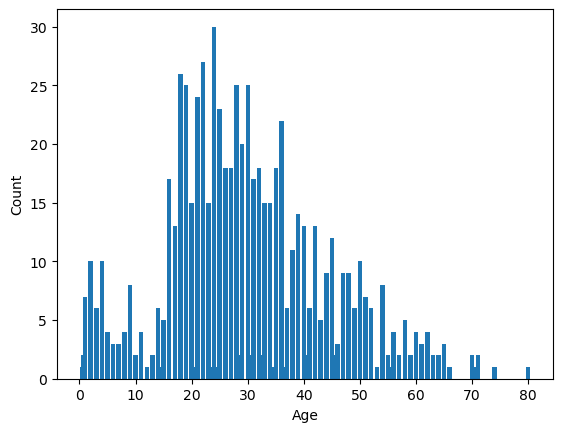

In [7]:
def freq_plot(df,column):
    x = []
    y = []
    for i in (df[column].unique()):
        x.append(i)
        y.append(len(df[df[column]==i]))
    plt.bar(x,y)  
    plt.ylabel('Count')
    plt.xlabel(column)
    plt.show()
freq_plot(df,"Age")

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df["Cabin"].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

## Preprocessing the data to train

In [10]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1036\548196730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)


In [11]:
df = df[[i for i in df.columns if i!="Cabin" and i!="Name"]]

In [12]:
def transform(df,column):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    return df
    
df = transform(df,"Sex")
df = transform(df,"Ticket")
df = transform(df,"Embarked")
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,523,7.2500,2
1,2,1,1,0,38.0,1,0,596,71.2833,0
2,3,1,3,0,26.0,0,0,669,7.9250,2
3,4,1,1,0,35.0,1,0,49,53.1000,2
4,5,0,3,1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,101,13.0000,2
887,888,1,1,0,19.0,0,0,14,30.0000,2
888,889,0,3,0,NaN,1,2,675,23.4500,2
889,890,1,1,1,26.0,0,0,8,30.0000,0


In [13]:
df1=df.dropna()
df1.shape

(714, 10)

In [14]:
df2=df
def clean_nulls(value):
    if np.isnan(value):
        return random.randint(20, 30)
    else:
        return value
df2["Age"]=df2["Age"].apply(clean_nulls)
df2.shape

(891, 10)

In [15]:
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
df3= df
df3["Age"] = df["Age"].fillna(df["Age"].mean())
df3.shape

(891, 10)

In [17]:
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
def adaboost(df, y, n_fold):
    X=df[[i for i in df.columns if i != y]]
    y=df[y]
    base_estimator = DecisionTreeClassifier(max_depth=1)
    adaboost_model = AdaBoostClassifier(
        estimator=base_estimator,
        n_estimators=50,
        learning_rate=1.0,
        random_state=42)
    
    kfold = KFold(n_splits=n_fold, shuffle=True, random_state=42)
    scores = cross_val_score(adaboost_model, X, y, cv=kfold, scoring='accuracy')

    print(f"Cross-validation scores: {scores}")
    print(f"Mean accuracy: {scores.mean():.4f}")

adaboost(df1,"Survived", 5)


Cross-validation scores: [0.73426573 0.74825175 0.77622378 0.87412587 0.8028169 ]
Mean accuracy: 0.7871


In [19]:
adaboost(df2,"Survived", 5)

Cross-validation scores: [0.81005587 0.76966292 0.81460674 0.76966292 0.84269663]
Mean accuracy: 0.8013


In [20]:
adaboost(df3,"Survived", 5)

Cross-validation scores: [0.81005587 0.76966292 0.81460674 0.76966292 0.84269663]
Mean accuracy: 0.8013


In [22]:
# def adaboost_save_folds(df, target_col, n_fold, base_path="adaboost_fold"):
#     X = df[[col for col in df.columns if col != target_col]]
#     y = df[target_col]

#     base_estimator = DecisionTreeClassifier(max_depth=1)
#     kfold = KFold(n_splits=n_fold, shuffle=True, random_state=42)

#     fold_accuracies = []
#     best_model = None
#     best_score = -np.inf
#     fold_num = 1

#     for train_idx, val_idx in kfold.split(X):
#         X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
#         y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

#         adaboost_model = AdaBoostClassifier(
#             estimator=base_estimator,
#             n_estimators=50,
#             learning_rate=1.0,
#             random_state=42
#         )

#         adaboost_model.fit(X_train, y_train)
#         preds = adaboost_model.predict(X_val)
#         acc = accuracy_score(y_val, preds)
#         fold_accuracies.append(acc)

#         # Save this fold model
#         model_path = f"{base_path}_fold{fold_num}.pkl"
#         joblib.dump(adaboost_model, model_path)
#         print(f"Fold {fold_num} accuracy: {acc:.4f}, saved as {model_path}")

#         # Track best model
#         if acc > best_score:
#             best_score = acc
#             best_model = adaboost_model
#             best_model_path = model_path

#         fold_num += 1

#     print(f"\nMean cross-validation accuracy: {np.mean(fold_accuracies):.4f}")
#     print(f"Best fold accuracy: {best_score:.4f}")
#     print(f"Best model saved at: {best_model_path}")

#     return best_model
# adaboost_df1 = adaboost_save_folds(df1, "Survived", 5, base_path="adaboost_fold")
# joblib.dump(adaboost_df1, "adaboost_df1.pkl")


In [27]:
def adaboost_save_folds(df, target_col, n_fold, model_name):
    X = df[[col for col in df.columns if col != target_col]]
    y = df[target_col]
    model_name = model_name+".pkl"
    base_estimator = DecisionTreeClassifier(max_depth=1)
    kfold = KFold(n_splits=n_fold, shuffle=True, random_state=42)

    fold_accuracies = []
    best_model = None
    best_score = -np.inf
    fold_num = 1
    confusion_matrix = []

    for train_idx, val_idx in kfold.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        adaboost_model = AdaBoostClassifier(
            estimator=base_estimator,
            n_estimators=50,
            learning_rate=1.0,
            random_state=42
        )

        adaboost_model.fit(X_train, y_train)
        preds = adaboost_model.predict(X_val)
        acc = accuracy_score(y_val, preds)
        fold_accuracies.append(acc)

        if acc > best_score:
            best_score = acc
            best_model = adaboost_model
            confusion_matrix = metrics.confusion_matrix(y_val, preds)

        fold_num += 1
        
    joblib.dump(adaboost_model, model_name)
    print(f"\nMean cross-validation accuracy: {np.mean(fold_accuracies):.4f}")
    print(f"Scores: {fold_accuracies}")
    print(f"Best fold accuracy: {best_score:.4f}")
    print(f"True_Positive: {confusion_matrix[0][0]}")
    print(f"False_Positive: {confusion_matrix[0][1]}")
    print(f"False_Negative: {confusion_matrix[1][0]}")
    print(f"True_Negative: {confusion_matrix[1][1]}")
    print(f"Best model saved as: {model_name}")

adaboost_df1 = adaboost_save_folds(df1, "Survived", 5, "adaboost_df1")



Mean cross-validation accuracy: 0.7871
Scores: [0.7342657342657343, 0.7482517482517482, 0.7762237762237763, 0.8741258741258742, 0.8028169014084507]
Best fold accuracy: 0.8741
True_Positive: 78
False_Positive: 12
False_Negative: 6
True_Negative: 47
Best model saved as: adaboost_df1.pkl


In [26]:
with open('adaboost_df1.pkl' , 'rb') as file:
    model = joblib.load(file)
X= df[[col for col in df.columns if col != "Survived"]]
y_val= df[["Survived"]]
arr = model.predict(X)
confusion_matrix = metrics.confusion_matrix(y_val, arr)
confusion_matrix

array([[487,  62],
       [101, 241]])

In [102]:
with open('adaboost_df1.pkl' , 'rb') as file:
    model = joblib.load(file)
X= df[[col for col in df.columns if col != "Survived"]]
arr = model.predict(X)
df["Predicted"] = arr
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Predicted
0,1,0,3,1,22.0,1,0,523,7.2500,2,0
1,2,1,1,0,38.0,1,0,596,71.2833,0,1
2,3,1,3,0,26.0,0,0,669,7.9250,2,1
3,4,1,1,0,35.0,1,0,49,53.1000,2,1
4,5,0,3,1,35.0,0,0,472,8.0500,2,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,101,13.0000,2,0
887,888,1,1,0,19.0,0,0,14,30.0000,2,1
888,889,0,3,0,20.0,1,2,675,23.4500,2,0
889,890,1,1,1,26.0,0,0,8,30.0000,0,1


In [104]:
df.to_excel(r"C:\Users\Admin\Desktop\test.xlsx",index=False)